In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


       HourObserved       Latitude      Longitude            AQI  \
count      111203.0  111203.000000  111203.000000  111203.000000   
mean            0.0      42.340514     -71.079204      31.640154   
std             0.0       0.031864       0.037590      12.894197   
min             0.0      42.255050     -71.160960       0.000000   
25%             0.0      42.317250     -71.096540      23.000000   
50%             0.0      42.348150     -71.070570      30.000000   
75%             0.0      42.361440     -71.055240      38.000000   
max             0.0      42.418870     -71.004000     145.000000   

       CategoryNumber        zipCode  
count   111203.000000  111203.000000  
mean         1.071887    2146.713524  
std          0.262959      66.998674  
min          1.000000    2108.000000  
25%          1.000000    2116.000000  
50%          1.000000    2125.000000  
75%          1.000000    2135.000000  
max          3.000000    2467.000000  


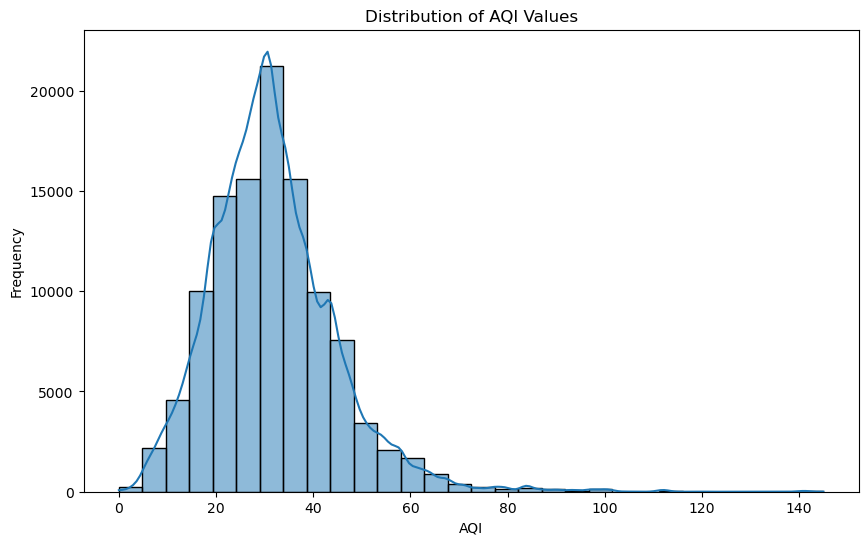

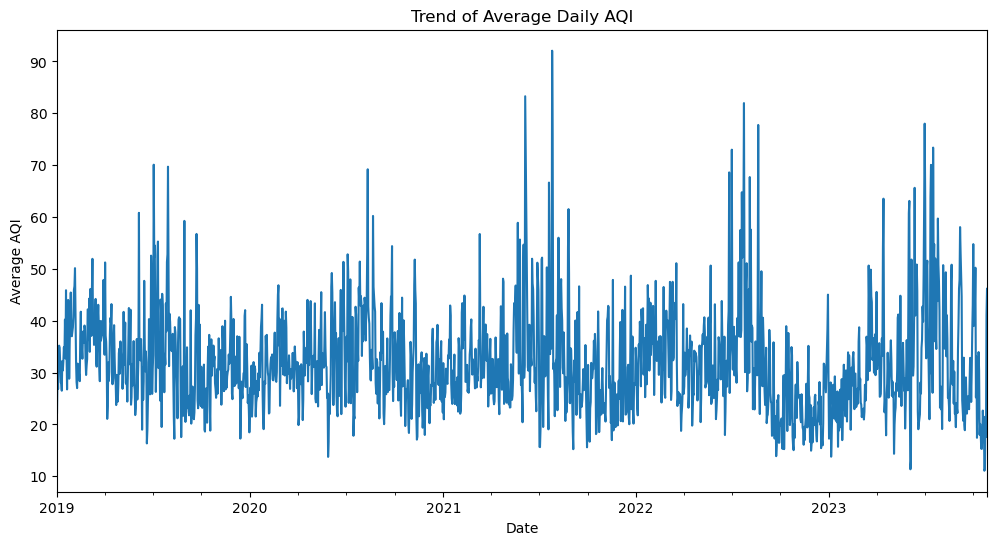

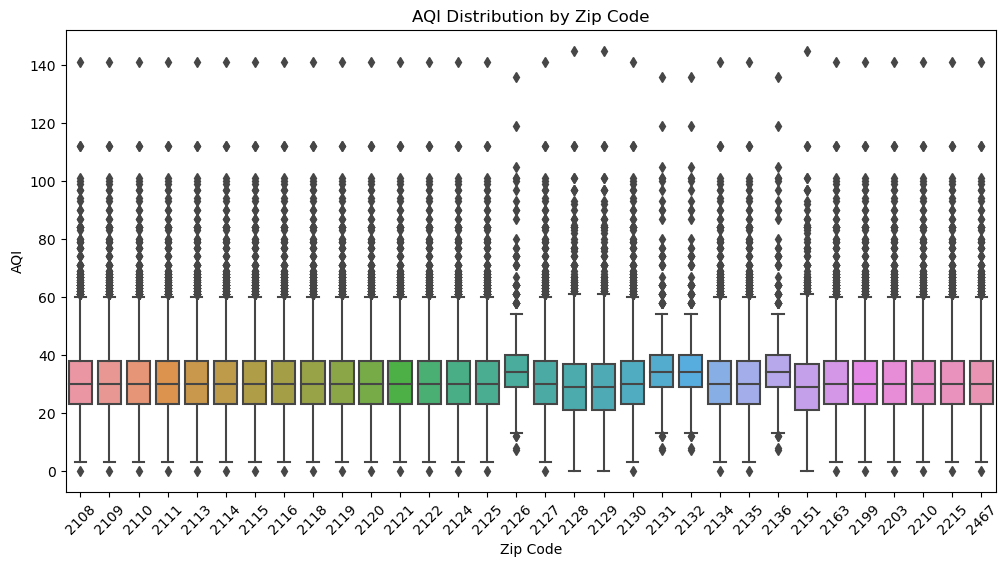

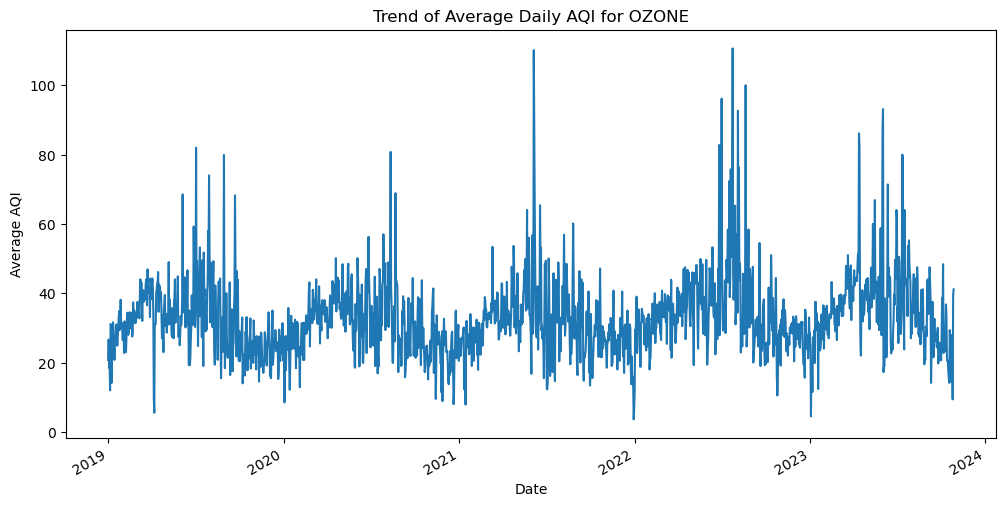

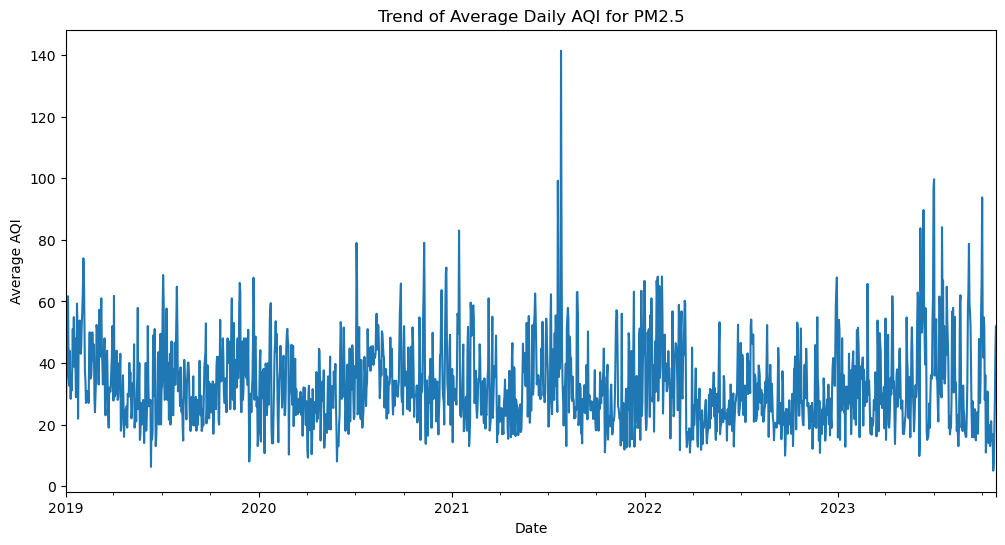

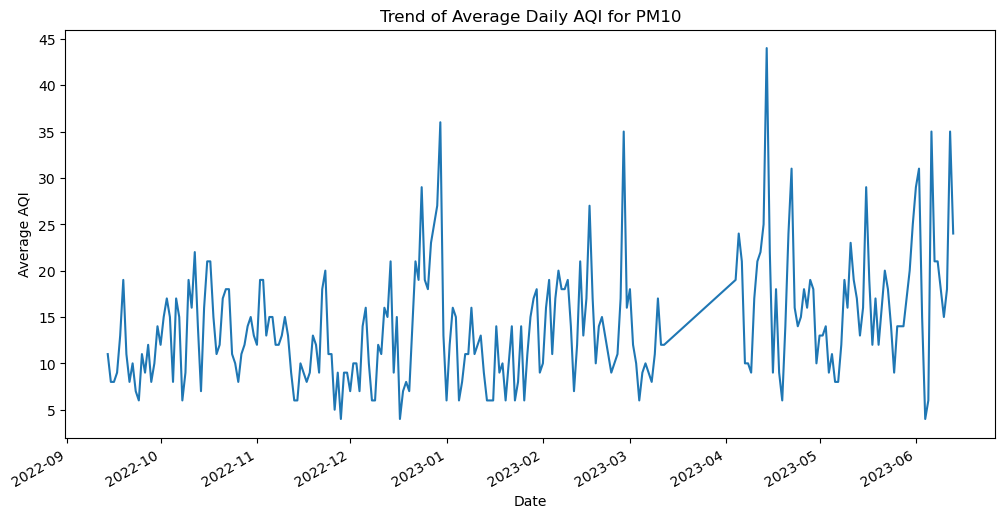

In [2]:
file_path = 'merged_air_quality_data.csv'  
air_quality_data = pd.read_csv(file_path)


air_quality_data.drop(columns=['Unnamed: 0', 'zipcode'], inplace=True)
air_quality_data['DateObserved'] = pd.to_datetime(air_quality_data['DateObserved'])


# Summary statistics
print(air_quality_data.describe())

# Distribution of AQI values
plt.figure(figsize=(10, 6))
sns.histplot(air_quality_data['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


# Trend of AQI over time
plt.figure(figsize=(12, 6))
air_quality_data.groupby('DateObserved')['AQI'].mean().plot()
plt.title('Trend of Average Daily AQI')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.show()

# AQI by Zip Code
plt.figure(figsize=(12, 6))
sns.boxplot(x='zipCode', y='AQI', data=air_quality_data)
plt.xticks(rotation=45)
plt.title('AQI Distribution by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('AQI')
plt.show()

# Analysis for different parameters like Ozone, PM2.5
for parameter in air_quality_data['ParameterName'].unique():
    plt.figure(figsize=(12, 6))
    air_quality_data[air_quality_data['ParameterName'] == parameter].groupby('DateObserved')['AQI'].mean().plot()
    plt.title(f'Trend of Average Daily AQI for {parameter}')
    plt.xlabel('Date')
    plt.ylabel('Average AQI')
    plt.show()



Analyze Health Data Alongside Air Quality Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

health_data_path = 'resulthealth.csv'  # Replace with your file path
health_data = pd.read_csv(health_data_path)

print(health_data.describe())


           TotChild   OlderAdult     MedIllnes          POC2           LEP  \
count     23.000000    23.000000     23.000000     23.000000     23.000000   
mean    4550.391304  2747.260870  10301.653478  14229.739130  10402.000000   
std     5573.638682  2367.913451   8213.637724  17151.485219  10017.237521   
min        0.000000    11.000000    230.530000    370.000000    197.000000   
25%      466.000000   792.000000   3562.390000   2984.000000   4173.000000   
50%     2552.000000  2122.000000   8467.930000   6923.000000   7177.000000   
75%     6029.000000  4110.000000  13610.735000  21007.500000  15485.000000   
max    19517.000000  8231.000000  28235.100000  67217.000000  39947.000000   

          Low_to_No        TotDis  MBTA_Stops_Count  AQI_OZONE      AQI_PM10  \
count     23.000000     23.000000         23.000000  23.000000  2.100000e+01   
mean    7654.739130   3073.956522          4.956522  32.718345  1.415600e+01   
std     8038.875607   3275.769410          3.925190   0.9

       HourObserved      Latitude     Longitude           AQI  CategoryNumber  \
count       79686.0  79686.000000  79686.000000  79686.000000    79686.000000   
mean            0.0     42.337869    -71.074854     31.663442        1.071895   
std             0.0      0.029337      0.033345     12.886415        0.262985   
min             0.0     42.255050    -71.154170      0.000000        1.000000   
25%             0.0     42.334550    -71.094810     23.000000        1.000000   
50%             0.0     42.340460    -71.070570     30.000000        1.000000   
75%             0.0     42.357970    -71.051850     38.000000        1.000000   
max             0.0     42.379750    -71.016160    145.000000        3.000000   

            zipCode      TotChild    OlderAdult     MedIllnes          POC2  \
count  79686.000000  79686.000000  79686.000000  79686.000000  79686.000000   
mean    2121.851906   4354.202005   2598.825754  10082.676483  13958.506977   
std        7.648491   5473.284721

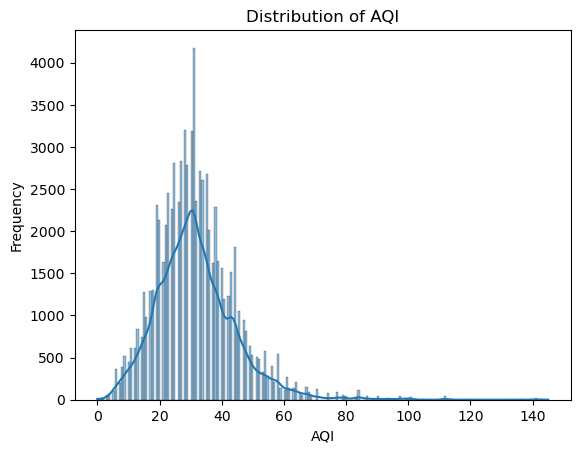

In [33]:
print(combined_data.describe())
sns.histplot(combined_data['AQI'], kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()



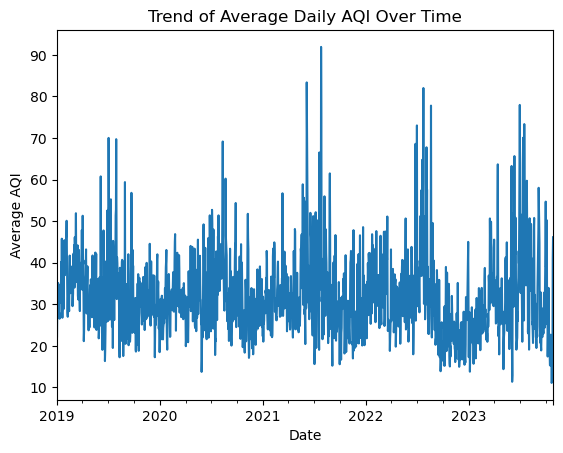

In [20]:
combined_data.groupby('DateObserved')['AQI'].mean().plot()
plt.title('Trend of Average Daily AQI Over Time')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.show()


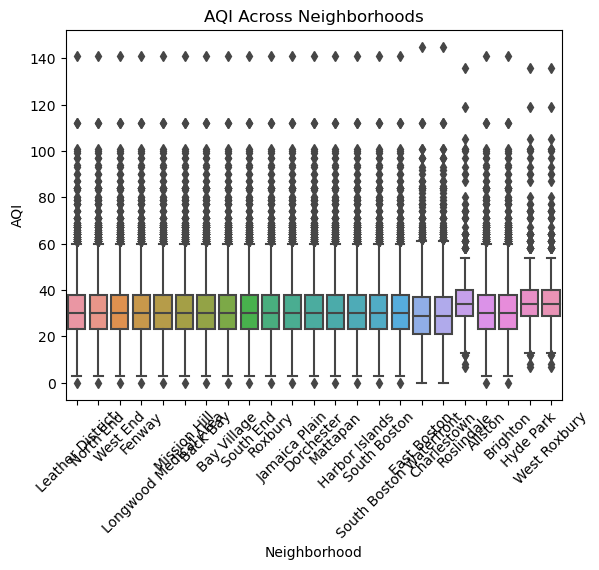

In [21]:
sns.boxplot(x='Name', y='AQI', data=combined_data)
plt.xticks(rotation=45)
plt.title('AQI Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('AQI')
plt.show()


In [97]:
from scipy.stats import pearsonr
for health_metric in ['MedIllnes', 'OlderAdult', 'Low_to_No', 'TotDis', 'CASTHMA_CrudePrev', 'COPD_CrudePrev', 'CHD_CrudePrev', 'STROKE_CrudePrev', 'HIGHCHOL_CrudePrev', 'GHLTH_CrudePrev', 'PHLTH_CrudePrev', 'MHLTH_CrudePrev', 'CSMOKING_CrudePrev', 'BINGE_CrudePrev', 'LPA_CrudePrev', 'OBESITY_CrudePrev', 'SLEEP_CrudePrev']:
    correlation, p_value = pearsonr(combined_data['AQI'], combined_data[health_metric])
    print(f"Correlation between AQI and {health_metric}: {correlation}, P-value: {p_value}")

Correlation between AQI and MedIllnes: -0.23790400100194264, P-value: 0.2743453936895719
Correlation between AQI and OlderAdult: -0.38941925733871585, P-value: 0.06625151816414565
Correlation between AQI and Low_to_No: -0.13402229700916593, P-value: 0.5420835977847493
Correlation between AQI and TotDis: -0.2711198086418043, P-value: 0.21081298959756253
Correlation between AQI and CASTHMA_CrudePrev: 0.20383630243101938, P-value: 0.35087402141710916
Correlation between AQI and COPD_CrudePrev: -0.2802982074010769, P-value: 0.19516438537003727
Correlation between AQI and CHD_CrudePrev: -0.29239399817951783, P-value: 0.17577445808490755
Correlation between AQI and STROKE_CrudePrev: -0.29531999518546587, P-value: 0.17129157680260465
Correlation between AQI and HIGHCHOL_CrudePrev: -0.39465092389094636, P-value: 0.06237834097818758
Correlation between AQI and GHLTH_CrudePrev: -0.2023444442284249, P-value: 0.3544866923398001
Correlation between AQI and PHLTH_CrudePrev: -0.26384424540539575, P-v

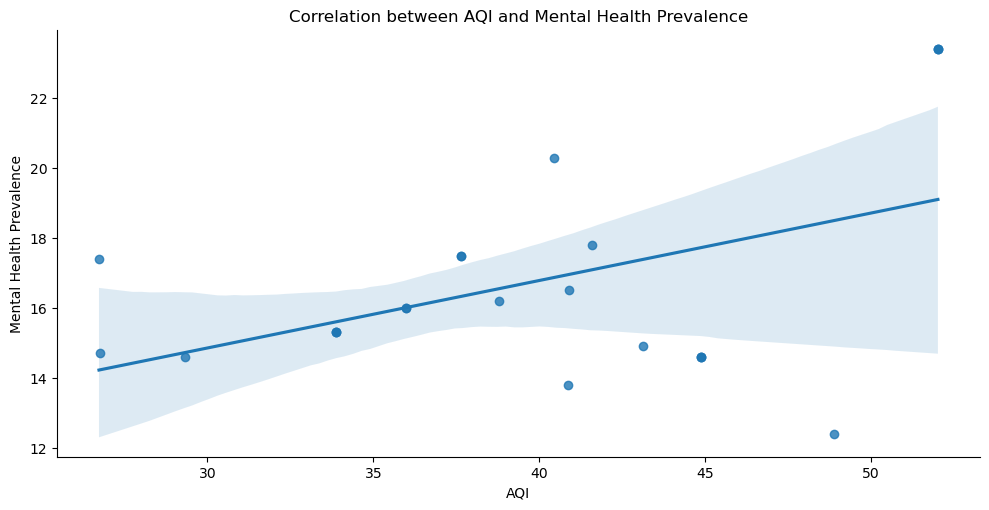

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with a regression line
sns.lmplot(x='AQI', y='MHLTH_CrudePrev', data=combined_data, aspect=2)
plt.title('Correlation between AQI and Mental Health Prevalence')
plt.xlabel('AQI')
plt.ylabel('Mental Health Prevalence')
plt.show()


Analysis the health data

google aqi


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

google_aqi_data_path = 'avg_aqi_google.csv'  # Replace with your file path
google_aqi_data = pd.read_csv(google_aqi_data_path)

print(google_aqi_data.describe())
new_data_path = 'avg_aqi_google.csv'  # Replace with your file path
new_air_quality_data = pd.read_csv(new_data_path)
print(new_air_quality_data.head())
print(new_air_quality_data.columns)




           zipCode          CO        NO2      PM2.5       PM10         O3  \
count    44.000000   44.000000  44.000000  44.000000  44.000000  44.000000   
mean   2152.159091  296.846430  23.586037  10.411782  27.601159  20.417072   
std      45.557499   45.905664   5.733627   2.193238   9.843766   1.262350   
min    2108.000000  223.168483  10.724213   5.952697   9.058989  19.548820   
25%    2118.750000  262.482079  21.484494   9.228090  21.067388  19.878694   
50%    2129.500000  309.305225  23.833090  10.456236  27.211208  19.957416   
75%    2201.500000  316.486124  29.567037  12.623652  38.762008  20.231110   
max    2293.000000  390.446461  30.008315  13.568876  40.024326  26.098090   

             SO2        AQI   latitude  longitude  
count  44.000000  44.000000  44.000000  44.000000  
mean    0.311817  41.617084  42.341183 -71.075086  
std     0.053263   7.435129   0.029734   0.032312  
min     0.227809  26.730337  42.252920 -71.165850  
25%     0.281868  36.688202  42.33521

In [82]:
print("Health Data Columns:", health_data.columns)
print("New Air Quality Data Columns:", new_air_quality_data.columns)

combined_data = pd.merge(health_data, new_air_quality_data, on='zipCode', how='inner')
print(combined_data.head())
print(combined_data.describe())

Health Data Columns: Index(['Name', 'TotChild', 'OlderAdult', 'MedIllnes', 'POC2', 'LEP',
       'Low_to_No', 'TotDis', 'MBTA_Stops_Count', 'AQI_OZONE', 'AQI_PM10',
       'AQI_PM2.5', 'CategoryName_OZONE', 'CategoryName_PM10',
       'CategoryName_PM2.5', 'zipCode', 'CASTHMA_CrudePrev', 'COPD_CrudePrev',
       'CHD_CrudePrev', 'STROKE_CrudePrev', 'HIGHCHOL_CrudePrev',
       'GHLTH_CrudePrev', 'PHLTH_CrudePrev', 'MHLTH_CrudePrev',
       'CSMOKING_CrudePrev', 'BINGE_CrudePrev', 'LPA_CrudePrev',
       'OBESITY_CrudePrev', 'SLEEP_CrudePrev'],
      dtype='object')
New Air Quality Data Columns: Index(['zipCode', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'SO2', 'AQI', 'category',
       'latitude', 'longitude'],
      dtype='object')
          Name  TotChild  OlderAdult  MedIllnes   POC2    LEP  Low_to_No  \
0      Allston       173         144    2831.85   3011   3444       3300   
1     Back Bay      1686        3759   11842.96   6923   9075       5316   
2  Bay Village      1249        171

Distribution of AQI for Specific Pollutants:

Visualize the distribution of AQI for different pollutants such as Ozone, PM10, and PM2.5.

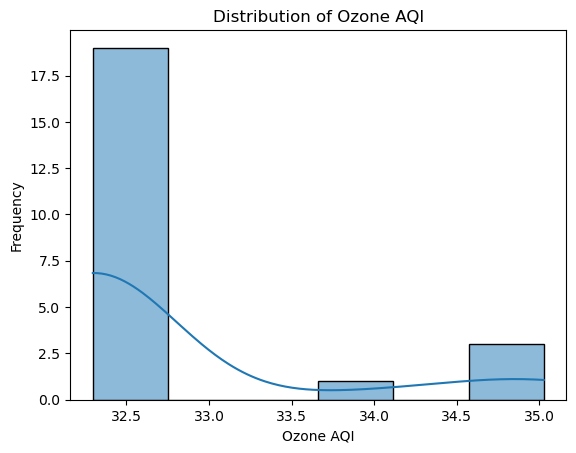

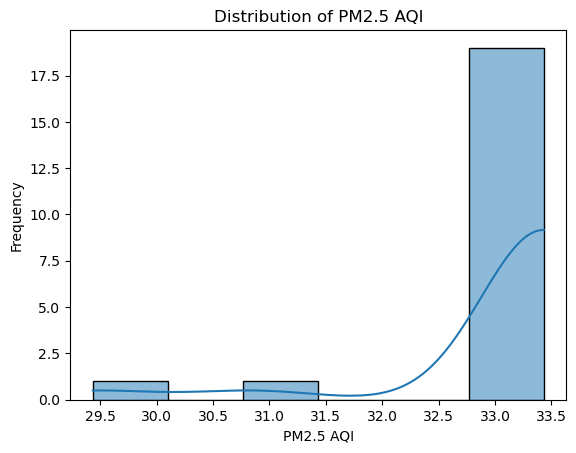

In [87]:
sns.histplot(combined_data['AQI_OZONE'], kde=True)
plt.title('Distribution of Ozone AQI')
plt.xlabel('Ozone AQI')
plt.ylabel('Frequency')
plt.show()


sns.histplot(combined_data['AQI_PM2.5'], kde=True)
plt.title('Distribution of PM2.5 AQI')
plt.xlabel('PM2.5 AQI')
plt.ylabel('Frequency')
plt.show()



General AQI Distribution:

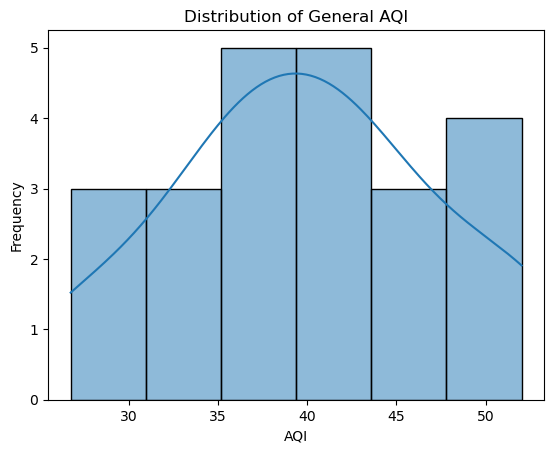

In [89]:
sns.histplot(combined_data['AQI'], kde=True)
plt.title('Distribution of General AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


                         AQI  MedIllnes  OlderAdult  Low_to_No    TotDis  \
AQI                 1.000000  -0.237904   -0.389419  -0.134022 -0.271120   
MedIllnes          -0.237904   1.000000    0.943604   0.914845  0.935072   
OlderAdult         -0.389419   0.943604    1.000000   0.791015  0.891027   
Low_to_No          -0.134022   0.914845    0.791015   1.000000  0.953597   
TotDis             -0.271120   0.935072    0.891027   0.953597  1.000000   
CASTHMA_CrudePrev   0.203836   0.189579    0.108517   0.174666  0.162989   
COPD_CrudePrev     -0.280298   0.369018    0.439157   0.336656  0.449399   
CHD_CrudePrev      -0.292394   0.293874    0.426908   0.234004  0.371561   
STROKE_CrudePrev   -0.295320   0.375596    0.487010   0.309132  0.437193   
HIGHCHOL_CrudePrev -0.394651   0.242806    0.420824   0.174739  0.334235   
GHLTH_CrudePrev    -0.202344   0.436007    0.448134   0.432103  0.497098   
PHLTH_CrudePrev    -0.263844   0.417873    0.460735   0.395662  0.487736   
MHLTH_CrudeP

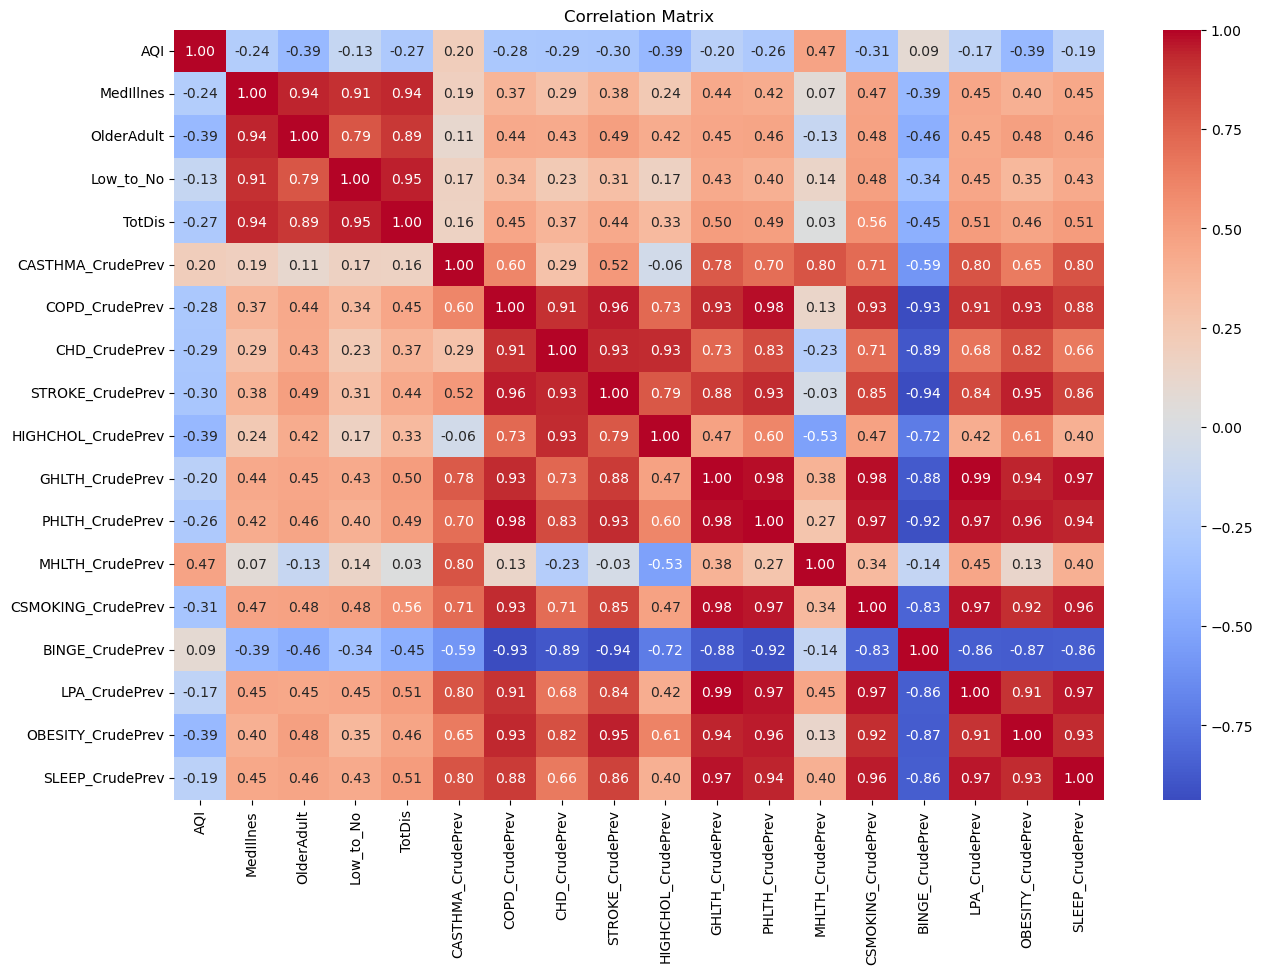

In [95]:
selected_columns = ['AQI', 'MedIllnes', 'OlderAdult', 'Low_to_No', 'TotDis', 'CASTHMA_CrudePrev', 'COPD_CrudePrev', 'CHD_CrudePrev', 'STROKE_CrudePrev', 'HIGHCHOL_CrudePrev', 'GHLTH_CrudePrev', 'PHLTH_CrudePrev', 'MHLTH_CrudePrev', 'CSMOKING_CrudePrev', 'BINGE_CrudePrev', 'LPA_CrudePrev', 'OBESITY_CrudePrev', 'SLEEP_CrudePrev']
correlation_matrix = combined_data[selected_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


                    AQI_OZONE  AQI_PM2.5  MedIllnes  OlderAdult  Low_to_No  \
AQI_OZONE            1.000000   0.099761   0.133752    0.335175  -0.075859   
AQI_PM2.5            0.099761   1.000000   0.030124   -0.000091   0.007343   
MedIllnes            0.133752   0.030124   1.000000    0.943604   0.914845   
OlderAdult           0.335175  -0.000091   0.943604    1.000000   0.791015   
Low_to_No           -0.075859   0.007343   0.914845    0.791015   1.000000   
TotDis               0.154884   0.016765   0.935072    0.891027   0.953597   
CASTHMA_CrudePrev    0.219409   0.114226   0.189579    0.108517   0.174666   
COPD_CrudePrev       0.443213  -0.115087   0.369018    0.439157   0.336656   
CHD_CrudePrev        0.473755  -0.089173   0.293874    0.426908   0.234004   
STROKE_CrudePrev     0.516869  -0.033928   0.375596    0.487010   0.309132   
HIGHCHOL_CrudePrev   0.432049  -0.143481   0.242806    0.420824   0.174739   
GHLTH_CrudePrev      0.360790  -0.074481   0.436007    0.448134 

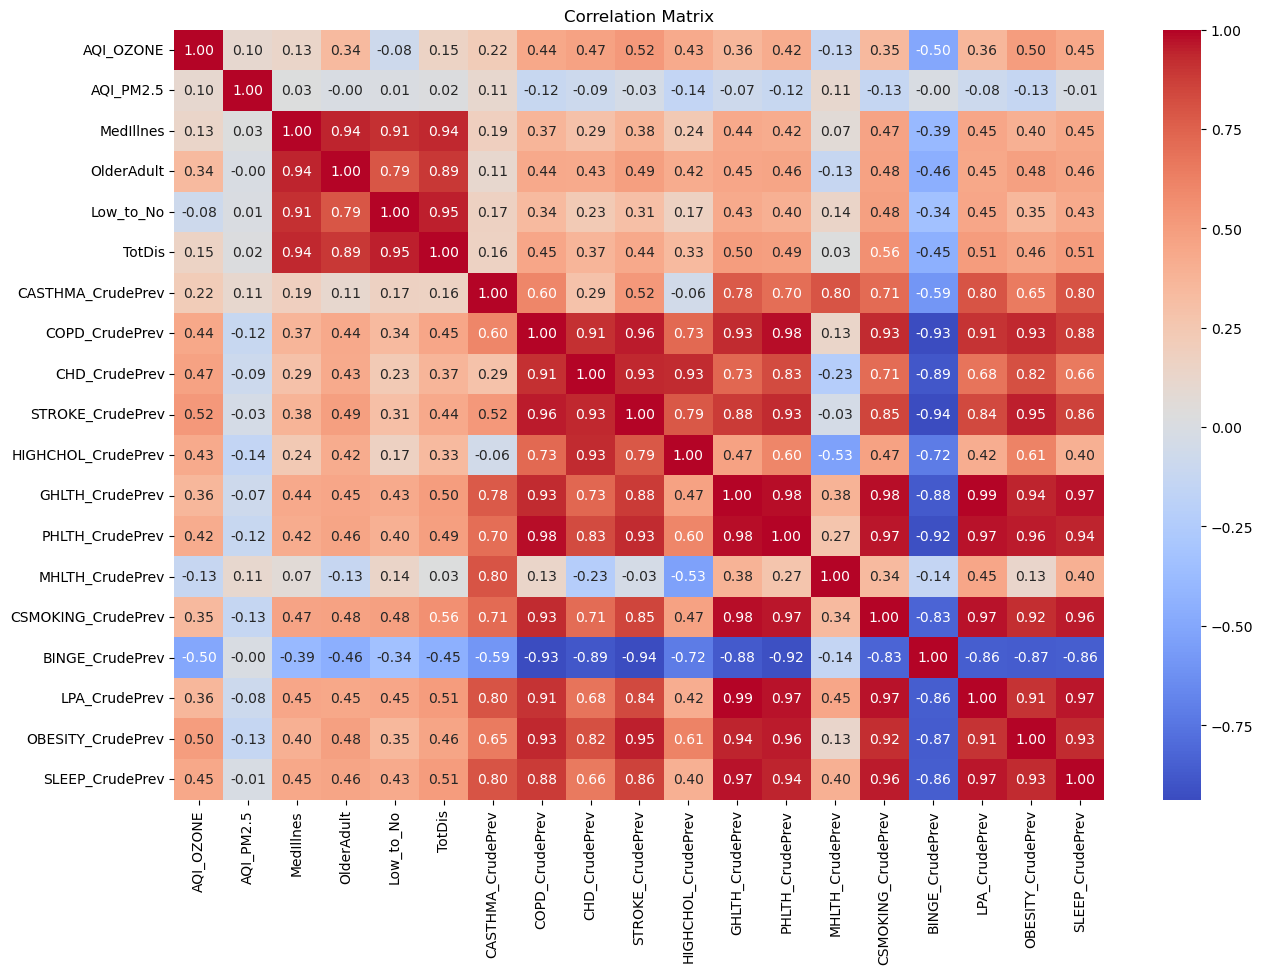

In [93]:
selected_columns = ['AQI_OZONE','AQI_PM2.5', 'MedIllnes', 'OlderAdult', 'Low_to_No', 'TotDis', 'CASTHMA_CrudePrev', 'COPD_CrudePrev', 'CHD_CrudePrev', 'STROKE_CrudePrev', 'HIGHCHOL_CrudePrev', 'GHLTH_CrudePrev', 'PHLTH_CrudePrev', 'MHLTH_CrudePrev', 'CSMOKING_CrudePrev', 'BINGE_CrudePrev', 'LPA_CrudePrev', 'OBESITY_CrudePrev', 'SLEEP_CrudePrev']
correlation_matrix = combined_data[selected_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
